In [1]:
%config Completer.use_jedi = False

In [15]:
from utils import *
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from numpy import nan

In [368]:
def read_parameter_data(path,names):
    
    data = []
    for name in names:
        inputData = pd.read_csv("{}{}.csv".format(path,name),dtype=object)
        inputData.infer_objects()#convert_dtypes(convert_string=False)
   
        data.append(pd.DataFrame(inputData))
    return data    
def parse_parameter_data(names,data):
    returnData = []
    for name, algoData in zip(names,data):
        results_dict = algoData['results']
        params_dict = algoData['parameters']
        result_values = {}
        result_values["paramGroup"] = []
        
        for key in eval(params_dict.iloc[0]).keys():
            result_values[key]=[]
        
        
        for key in eval(results_dict.iloc[0]).keys():
            result_values[key] = []
        
        
        #generate_param_groups(params_dict)
        
        for resultRow in algoData.iterrows():
            
            
            
            rowParameters = eval(resultRow[1]['parameters'])
            
            rowResults = eval(resultRow[1]['results'])
            
            for listIndex in range(len(rowResults["fitness"])):
                for paramKey in rowParameters.keys():
                    result_values[paramKey].append(rowParameters[paramKey])
                    

                for resultKey in rowResults.keys():
                    
                    
                    result_values[resultKey].append(rowResults[resultKey][listIndex])
                    if type(rowResults[resultKey][listIndex]) == list:
                        finalKey = "{}_final".format(resultKey)

                        if not finalKey in result_values.keys():
                            result_values[finalKey] = []
                        result_values[finalKey].append(rowResults[resultKey][listIndex][-1])

                
        #print(result_values)
        returnData.append(pd.DataFrame(result_values))
        
        
        
    return returnData

In [369]:
names = ["SA_20"]
dataPath = "../logs/2021-2-17-15-11/"
algorithm_data = parse_parameter_data(names,read_parameter_data(dataPath,names))
nsgaiii_data = algorithm_data[0]

In [331]:
nsgaiii_data

,paramGroup,mutation,crossover,algorithm,fitness,fuel_consumption,computation_time,optimal_time,maxDriveTimes,violation,fitness_final,fuel_consumption_final,maxDriveTimes_final,violation_final
0,0,0.3,0.3,NSGA-III,"[287.36554056048175, 272.26808624134844, 293.0...","[287.36554056048175, 272.26808624134844, 293.0...",37.675408,36.691958,"[69778, 37699, 36125, 34753, 32158, 31709, 308...","[-50002, -14007, -12126, -9978, -7383, -6939, ...",197.019029,197.019029,22367,0
1,0,0.3,0.3,NSGA-III,"[284.722215925249, 303.240592219408, 306.18454...","[284.722215925249, 303.240592219408, 306.18454...",39.680361,38.718956,"[65583, 46679, 40165, 37408, 37408, 34728, 346...","[-46150, -23561, -17047, -14194, -14194, -1114...",193.893060,193.893060,24133,0
2,0,0.3,0.3,NSGA-III,"[253.28127693604307, 253.85080665418837, 256.7...","[253.28127693604307, 253.85080665418837, 256.7...",39.374590,33.686625,"[66388, 44066, 32258, 32258, 29038, 29038, 269...","[-46648, -21736, -7058, -7058, -3838, -3838, -...",187.310489,187.310489,24704,0
3,0,0.3,0.3,NSGA-III,"[274.07376863045386, 268.74505807175535, 280.3...","[274.07376863045386, 268.74505807175535, 280.3...",39.703243,37.039654,"[67342, 38495, 37916, 37318, 35726, 32626, 295...","[-48072, -15956, -14552, -13174, -11582, -8025...",179.311140,179.311140,22027,0
4,0,0.3,0.3,NSGA-III,"[265.73591824316003, 287.87155662314206, 290.8...","[265.73591824316003, 287.87155662314206, 290.8...",38.729023,38.387196,"[65151, 42544, 38809, 34931, 34931, 31894, 318...","[-45891, -19086, -15351, -11473, -11473, -8436...",210.555540,210.555540,23530,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,15,0.6,0.6,NSGA-III,"[251.00124725120423, 264.96642400141815, 283.0...","[251.00124725120423, 264.96642400141815, 283.0...",33.888334,31.904355,"[63531, 42243, 38892, 36139, 34742, 33345, 333...","[-44261, -19790, -14730, -11540, -10748, -8998...",169.692008,169.692008,23017,0
76,15,0.6,0.6,NSGA-III,"[274.6686185784488, 262.6715088531958, 277.109...","[274.6686185784488, 262.6715088531958, 277.109...",34.632690,34.335756,"[70091, 57010, 49935, 44433, 34472, 32654, 327...","[-50315, -33857, -26522, -20587, -10576, -8758...",193.626022,193.626022,24652,0
77,15,0.6,0.6,NSGA-III,"[274.38951441381397, 276.72681207905487, 299.9...","[274.38951441381397, 276.72681207905487, 299.9...",34.329087,33.171257,"[65996, 39915, 35839, 33756, 33756, 33131, 321...","[-46563, -15955, -11749, -9666, -9106, -8481, ...",198.636783,198.636783,24716,0
78,15,0.6,0.6,NSGA-III,"[260.5561729332941, 272.2280375246067, 273.328...","[260.5561729332941, 272.2280375246067, 273.328...",34.621425,33.174808,"[66877, 35961, 34453, 33574, 33574, 33574, 296...","[-47607, -13227, -11094, -10215, -9749, -8701,...",148.503413,148.503413,20835,0


In [288]:
nsgaiii_grouped = nsgaiii_data.groupby(['paramGroup','mutation','crossover'])

nsgaiii_grouped.all()


,,,algorithm,fitness,fuel_consumption,computation_time,optimal_time,maxDriveTimes,violation,fitness_final,fuel_consumption_final,maxDriveTimes_final,violation_final
paramGroup,mutation,crossover,,,,,,,,,,,
0,0.3,0.3,True,True,True,True,True,True,True,True,True,True,False
1,0.3,0.4,True,True,True,True,True,True,True,True,True,True,False
2,0.3,0.5,True,True,True,True,True,True,True,True,True,True,False
3,0.3,0.6,True,True,True,True,True,True,True,True,True,True,False
4,0.4,0.3,True,True,True,True,True,True,True,True,True,True,False
5,0.4,0.4,True,True,True,True,True,True,True,True,True,True,False
6,0.4,0.5,True,True,True,True,True,True,True,True,True,True,False
7,0.4,0.6,True,True,True,True,True,True,True,True,True,True,False
8,0.5,0.3,True,True,True,True,True,True,True,True,True,True,False


In [332]:
import pingouin as pg

aov = pg.anova(dv='fuel_consumption_final',between = ['paramGroup'],data=nsgaiii_data,detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,paramGroup,8397.399643,15,559.826643,2.675801,0.003266,0.385425
1,Within,13389.974132,64,209.218346,NaN,NaN,NaN


In [333]:
import pingouin as pg

aov = pg.anova(dv='fuel_consumption_final',between = ['mutation','crossover'],data=nsgaiii_data,detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,mutation,5852.958275,3,1950.986092,9.325120,0.000034,0.304161
1,crossover,358.441089,3,119.480363,0.571080,0.636089,0.026071
2,mutation * crossover,2186.000279,9,242.888920,1.160935,0.335032,0.140344
3,Residual,13389.974132,64,209.218346,NaN,NaN,NaN


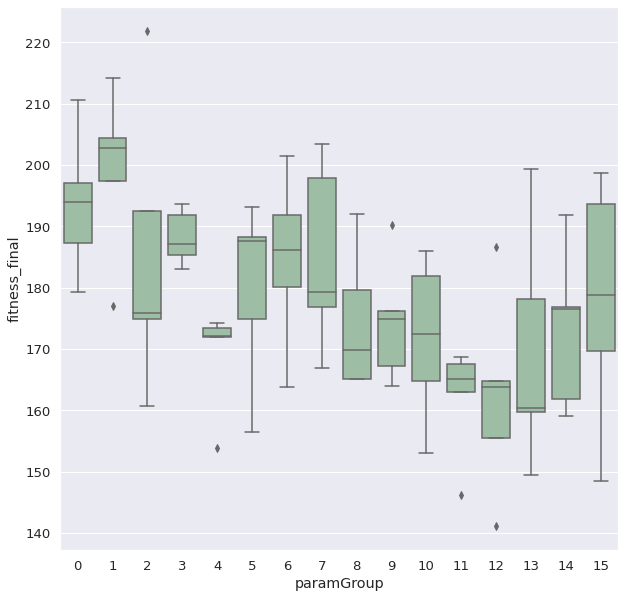

In [340]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='paramGroup', y='fitness_final', data=nsgaiii_data, color='#99c2a2')

#ax = sns.swarmplot(x="mutation", y="fitness_final", data=nsgaiii_data, color='#7d0013')
plt.show()

<AxesSubplot:title={'center':'fitness_final'}, xlabel='paramGroup'>

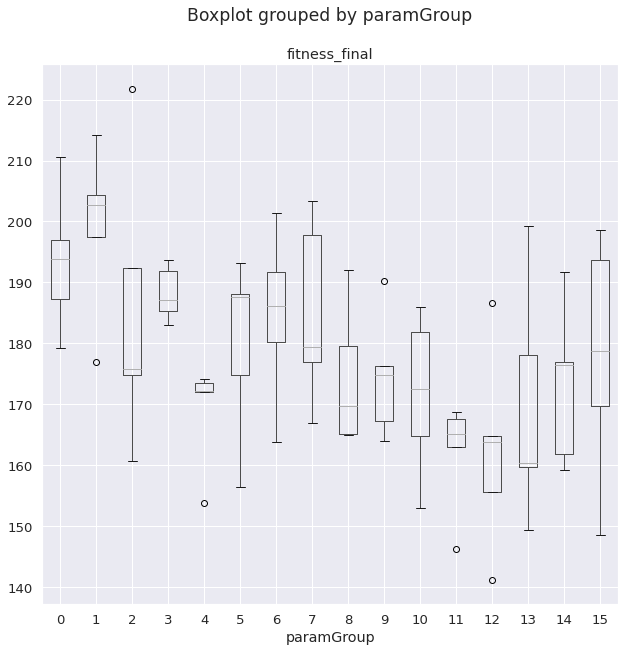

In [296]:

nsgaiii_data.boxplot('fitness_final',by='paramGroup',figsize=(10,10))

In [303]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=nsgaiii_data, res_var='fitness_final', xfac_var='paramGroup', anova_model='fitness_final ~ C(paramGroup)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0,1,5.533556,-27.083733,38.150845,0.855440,0.900000
1,0,2,8.521504,-24.095786,41.138793,1.317351,0.900000
2,0,3,5.419803,-27.197486,38.037092,0.837855,0.900000
3,0,4,24.488235,-8.129054,57.105524,3.785669,0.370085
4,0,5,13.578019,-19.039270,46.195308,2.099044,0.900000
...,...,...,...,...,...,...,...
115,12,14,10.842048,-21.775241,43.459337,1.676087,0.900000
116,12,15,15.467093,-17.150196,48.084382,2.391078,0.900000
117,13,14,3.836251,-28.781038,36.453541,0.593051,0.900000
118,13,15,8.461296,-24.155993,41.078586,1.308043,0.900000


/home/andreash/Documents/School/Master_Thesis/Explorer/env/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<Figure size 720x720 with 0 Axes>

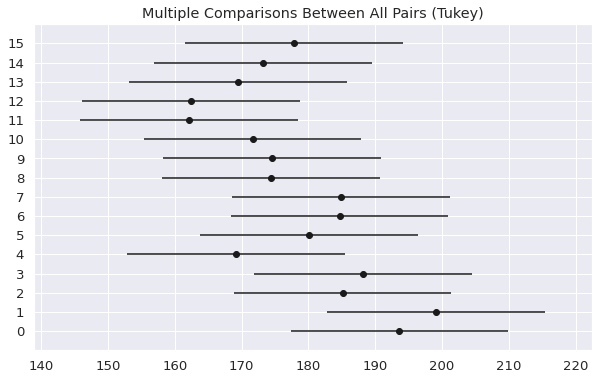

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,5.5336,0.9,-27.0837,38.1508,False
0,2,-8.5215,0.9,-41.1388,24.0958,False
0,3,-5.4198,0.9,-38.0371,27.1975,False
0,4,-24.4882,0.3701,-57.1055,8.1291,False
0,5,-13.578,0.9,-46.1953,19.0393,False
0,6,-8.9532,0.9,-41.5705,23.6641,False
0,7,-8.7468,0.9,-41.3641,23.8705,False
0,8,-19.2832,0.7248,-51.9005,13.334,False
0,9,-19.1103,0.7362,-51.7276,13.507,False
0,10,-21.9883,0.5452,-54.6056,10.629,False


In [342]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
plt.figure(figsize=(10,10))
tukey = pairwise_tukeyhsd(endog=nsgaiii_data.fitness_final,groups=nsgaiii_data.paramGroup,alpha=0.05)
tukey.plot_simultaneous()
plt.show()
tukey.summary()

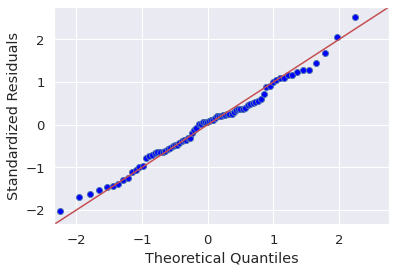

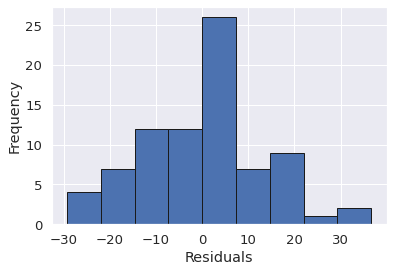

In [304]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [301]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols('fitness_final ~ C(paramGroup)',data=nsgaiii_data).fit()
anova_result = sm.stats.anova_lm(lm,typ=2)
anova_result

,sum_sq,df,F,PR(>F)
C(paramGroup),8397.399643,15.0,2.675801,0.003266
Residual,13389.974132,64.0,NaN,NaN


In [302]:
anova_result.anova

<pandas_flavor.register.register_dataframe_method.<locals>.inner.<locals>.AccessorMethod at 0x7fb980105bb0>

In [151]:
sa_grouped = sa_data.groupby(['mutation','alpha'])


In [281]:
resid = lm.resid
symbols = ['D', '^']
colors = ['r', 'g', 'blue']
plt.figure(figsize=(6,6));
for values, group in sa_grouped:
    i,j = values
    group_num = i*2 + j - 1  # for plotting purposes
    x = [group_num] * len(group)
    print(x)
    print(group_num)
    plt.scatter(x, resid[group.index], marker=symbols[j], color=colors[i-1],
            s=144, edgecolors='black')
plt.xlabel('Group');
plt.ylabel('Residuals');

[0.1499999999999999]
0.1499999999999999


TypeError: list indices must be integers or slices, not numpy.float64

<Figure size 432x432 with 0 Axes>

In [157]:
sa_grouped

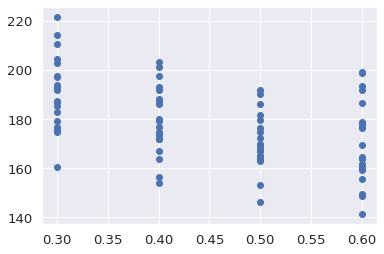

In [283]:
plt.scatter(nsgaiii_data.mutation,nsgaiii_data.fitness_final)#,c=algorithm_data[3].crossover)